In [1]:
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
import pandas as pd
import networkx as nx
from utils import *

In [2]:
g = erdos()
info(g)

Is Directed:              False
Average Degree:           59.333333333333336
Max Degree:               79
Clustering Coefficient:   0.19898332480934391
Number of Vertices:       300
Number of Edges:          8900
Gamma:                    1.3887799424237388
Number of Components:     1
Number of Pendant Nodes   0
Number of Isolated Nodes  0
LCC:                      1.0
Avg. Path Length:         1.8015607580824973


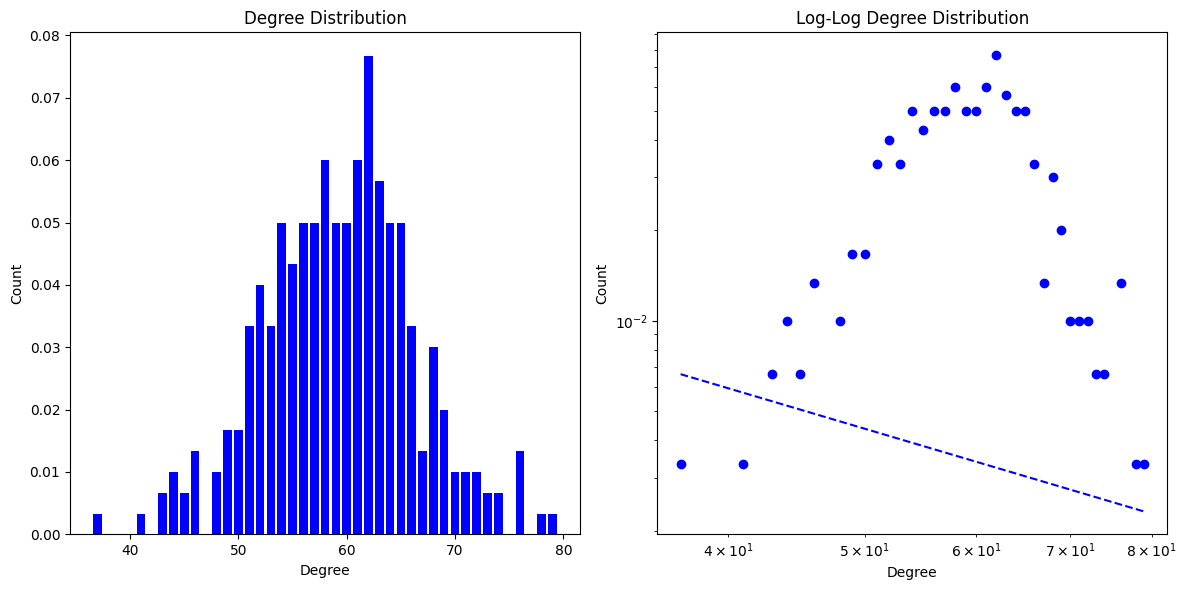

In [3]:
plot_deg(g)

In [4]:
dg = read_pajek("example-graphs/dolphins.net")
list([v['name'] for v in dg.vs])[:10]

['Beak',
 'Beescratch',
 'Bumper',
 'CCL',
 'Cross',
 'DN16',
 'DN21',
 'DN63',
 'Double',
 'Feather']

In [5]:
dg.vs.find('DN16')

igraph.Vertex(<igraph.Graph object at 0x00000196AFD33750>, 5, {'name': 'DN16'})

In [6]:
df = dg.get_edge_dataframe()
df = df[df['source'] == 0]
df

,source,target
edge ID,,
0,0,10
1,0,14
2,0,15
3,0,40
4,0,42
5,0,47


In [7]:
dg.get_edgelist()[:10]

[(0, 10),
 (0, 14),
 (0, 15),
 (0, 40),
 (0, 42),
 (0, 47),
 (1, 17),
 (1, 19),
 (1, 26),
 (1, 27)]

In [8]:
np.max(dg.degree())

12

In [9]:
list(components(dg))

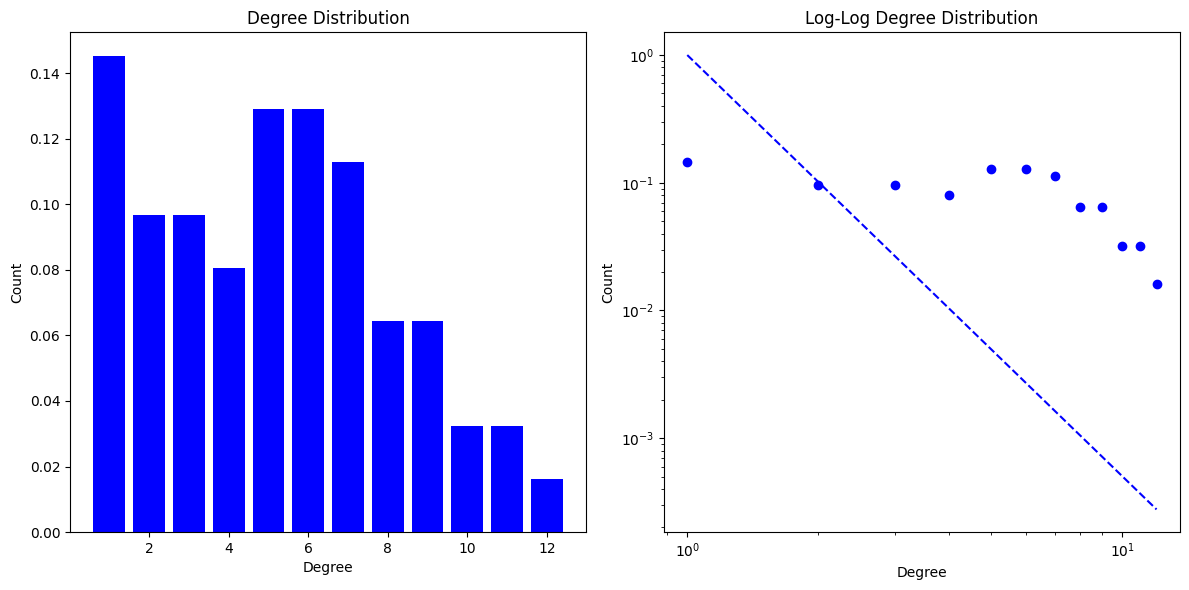

In [10]:
plot_deg(dg)

In [11]:
gi = read_pajek("example-graphs/imdb.net")
info(gi, approx_len=True)

Is Directed:              False
Average Degree:           32.6647323206463
Max Degree:               784
Clustering Coefficient:   0.3390564076688012
Number of Vertices:       17577
Number of Edges:          287074
Gamma:                    1.621899020690801
Number of Components:     19
Number of Pendant Nodes   475
Number of Isolated Nodes  0
LCC:                      0.9930591113386812
Approx. Avg. Path Length: 4.986531986531986


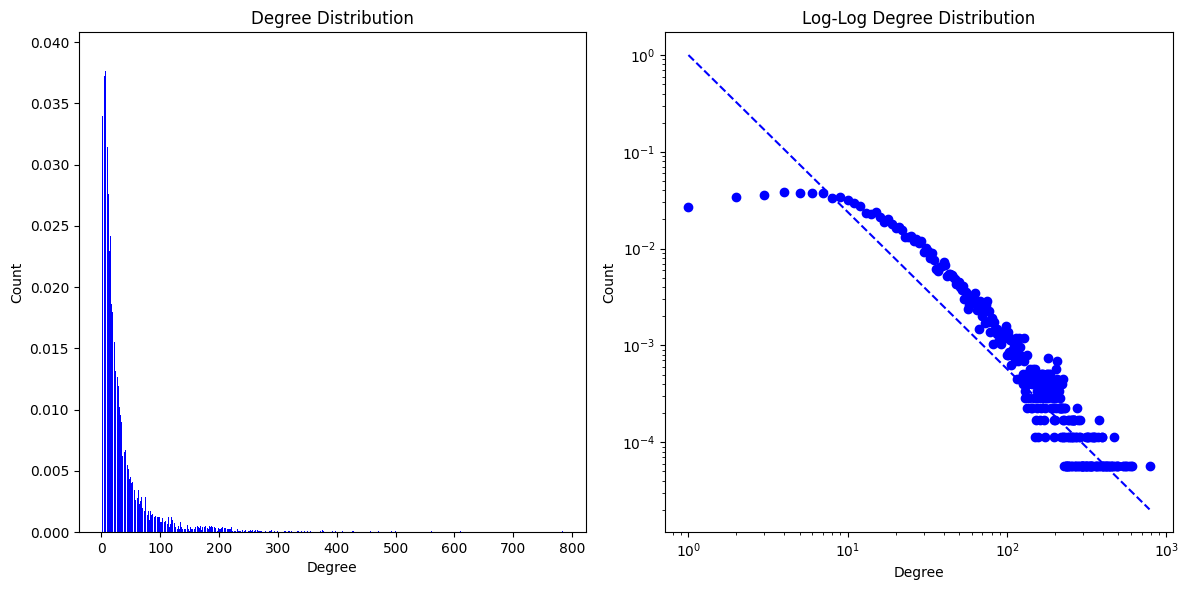

In [12]:
plot_deg(gi)

In [13]:
networkx_graph = to_networkx(dg)

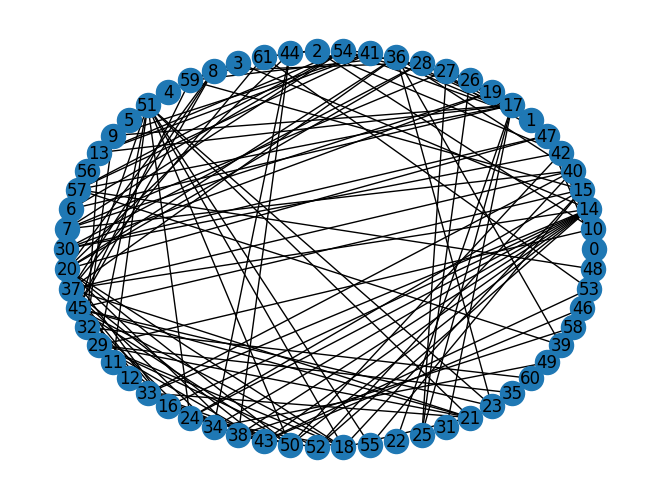

In [14]:
# circular
pos = nx.circular_layout(networkx_graph)
nx.draw(networkx_graph, pos, with_labels=True)
plt.show()

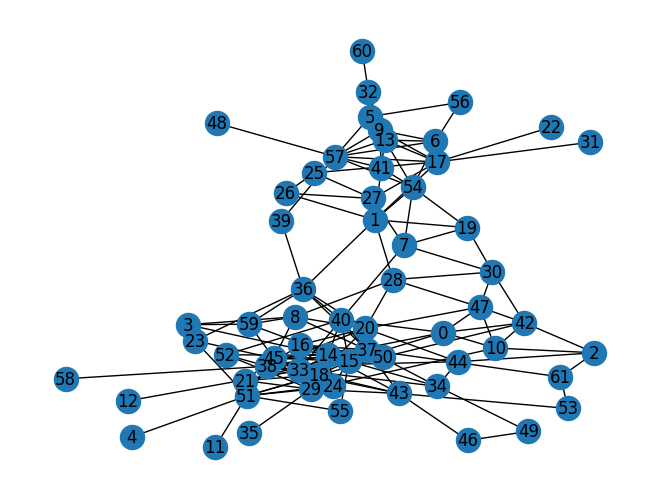

In [15]:
pos = nx.spring_layout(networkx_graph)
nx.draw(networkx_graph, pos, with_labels=True)
plt.show()

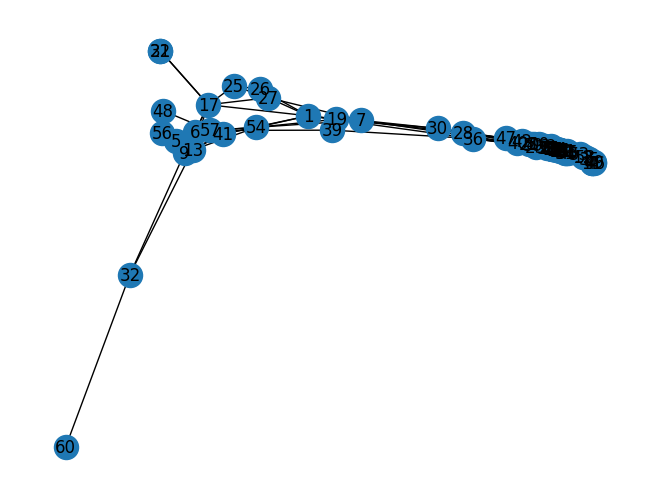

In [16]:
pos = nx.spectral_layout(networkx_graph)
nx.draw(networkx_graph, pos, with_labels=True)
plt.show()

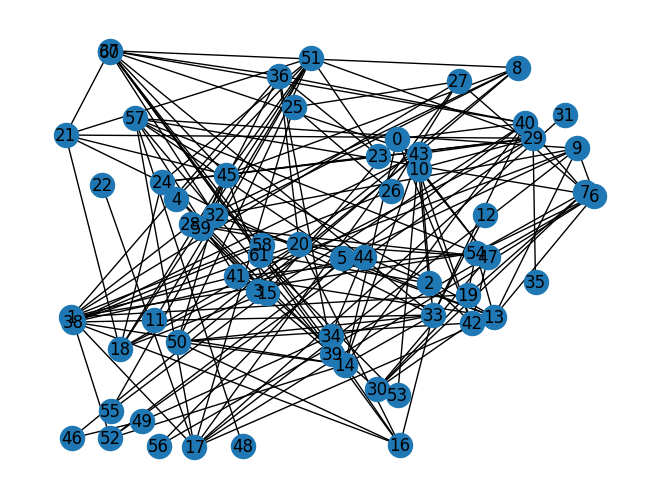

In [17]:
pos = nx.random_layout(networkx_graph)
nx.draw(networkx_graph, pos, with_labels=True)
plt.show()

In [18]:
g_complete = Graph.Full(300)
info(g_complete)

Is Directed:              False
Average Degree:           299.0
Max Degree:               299
Clustering Coefficient:   1.0
Number of Vertices:       300
Number of Edges:          44850
Gamma:                    1.2383014155372853
Number of Components:     1
Number of Pendant Nodes   0
Number of Isolated Nodes  0
LCC:                      1.0
Avg. Path Length:         1.0


In [19]:
g_small_world = watts_strogatz(n=300, p=0.3)
info(g_small_world)

Is Directed:              False
Average Degree:           8.0
Max Degree:               14
Clustering Coefficient:   0.10538457838457833
Number of Vertices:       300
Number of Edges:          1200
Gamma:                    2.7532126634956584
Number of Components:     1
Number of Pendant Nodes   0
Number of Isolated Nodes  0
LCC:                      1.0
Avg. Path Length:         3.0645707915273133


In [20]:
g_tree = ig.Graph.Tree(300, 6)
info(g_tree)

Is Directed:              False
Average Degree:           1.9933333333333334
Max Degree:               7
Clustering Coefficient:   0.0
Number of Vertices:       300
Number of Edges:          299
Gamma:                    3.2953325154743425
Number of Components:     1
Number of Pendant Nodes   250
Number of Isolated Nodes  0
LCC:                      1.0
Avg. Path Length:         5.49520624303233


In [21]:
g_price = price(n=300)
info(g_price)

Is Directed:              False
Average Degree:           5.96
Max Degree:               41
Clustering Coefficient:   0.06927228419501857
Number of Vertices:       300
Number of Edges:          894
Gamma:                    2.744474428750479
Number of Components:     1
Number of Pendant Nodes   0
Number of Isolated Nodes  0
LCC:                      1.0
Avg. Path Length:         3.0902341137123748


In [22]:
g_cycle = ig.Graph.Ring(n=300, directed=False)
info(g_cycle)

Is Directed:              False
Average Degree:           2.0
Max Degree:               2
Clustering Coefficient:   0.0
Number of Vertices:       300
Number of Edges:          300
Gamma:                    nan
Number of Components:     1
Number of Pendant Nodes   0
Number of Isolated Nodes  0
LCC:                      1.0
Avg. Path Length:         75.25083612040133


c:\Users\janezs\Documents\personal\network-utils\utils\helpers.py:121: RuntimeWarning: divide by zero encountered in scalar power
  return 1 + n * (vec_sum ** -1)
c:\Users\janezs\Documents\personal\network-utils\utils\helpers.py:121: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 + n * (vec_sum ** -1)


In [23]:
g_random_deg_2 = erdos(n=300, p=2/(300 - 1))
info(g_random_deg_2)

Is Directed:              False
Average Degree:           2.026666666666667
Max Degree:               8
Clustering Coefficient:   0.0
Number of Vertices:       300
Number of Edges:          304
Gamma:                    5.904384978835066
Number of Components:     49
Number of Pendant Nodes   83
Number of Isolated Nodes  43
LCC:                      0.8166666666666667
Avg. Path Length:         6.609217699588615


In [35]:
g_infos = [info_as_dict(g) for g in [g_complete, g_tree, g_price, g_small_world, g_cycle, g_random_deg_2]]
df_info = pd.DataFrame(g_infos)
df_info.index = ['Complete', 'Tree', 'Scale-free gamma=2.5', 'Small world', 'Cycle', 'Random <k> = 2']
df_info

c:\Users\janezs\Documents\personal\network-utils\utils\helpers.py:121: RuntimeWarning: divide by zero encountered in scalar power
  return 1 + n * (vec_sum ** -1)
c:\Users\janezs\Documents\personal\network-utils\utils\helpers.py:121: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 + n * (vec_sum ** -1)


,Is Directed,Average Degree,Max Degree,Clustering Coefficient,Number of Vertices,Number of Edges,Gamma,Number of Components,LCC,Number of Pendant Nodes,Number of Isolated Nodes,Avg. Path Length
Complete,False,299.000000,299,1.000000,300,44850,1.238301,1,1.000000,0,0,1.000000
Tree,False,1.993333,7,0.000000,300,299,3.295333,1,1.000000,250,0,5.495206
Scale-free gamma=2.5,False,5.960000,41,0.069272,300,894,2.744474,1,1.000000,0,0,3.090234
Small world,False,8.000000,14,0.105385,300,1200,2.753213,1,1.000000,0,0,3.064571
Cycle,False,2.000000,2,0.000000,300,300,NaN,1,1.000000,0,0,75.250836
Random <k> = 2,False,2.026667,8,0.000000,300,304,5.904385,49,0.816667,83,43,6.609218


In [36]:
df_info = df_info.sort_values(by='Average Degree', ascending=False)
df_info = df_info.round(3)
df_info = df_info.drop(columns='Is Directed')
df_info = df_info.drop(columns='Number of Components')
df_info = df_info.drop(columns='Number of Pendant Nodes')
df_info = df_info.drop(columns='Number of Isolated Nodes')
df_info

,Average Degree,Max Degree,Clustering Coefficient,Number of Vertices,Number of Edges,Gamma,LCC,Avg. Path Length
Complete,299.000,299,1.000,300,44850,1.238,1.000,1.000
Small world,8.000,14,0.105,300,1200,2.753,1.000,3.065
Scale-free gamma=2.5,5.960,41,0.069,300,894,2.744,1.000,3.090
Random <k> = 2,2.027,8,0.000,300,304,5.904,0.817,6.609
Cycle,2.000,2,0.000,300,300,NaN,1.000,75.251
Tree,1.993,7,0.000,300,299,3.295,1.000,5.495


In [37]:
print(df_info.to_markdown())

|                      |   Average Degree |   Max Degree |   Clustering Coefficient |   Number of Vertices |   Number of Edges |   Gamma |   LCC |   Avg. Path Length |
|:---------------------|-----------------:|-------------:|-------------------------:|---------------------:|------------------:|--------:|------:|-------------------:|
| Complete             |          299     |          299 |                    1     |                  300 |             44850 |   1.238 | 1     |              1     |
| Small world          |            8     |           14 |                    0.105 |                  300 |              1200 |   2.753 | 1     |              3.065 |
| Scale-free gamma=2.5 |            5.96  |           41 |                    0.069 |                  300 |               894 |   2.744 | 1     |              3.09  |
| Random <k> = 2       |            2.027 |            8 |                    0     |                  300 |               304 |   5.904 | 0.817 |              